### 과제2: 이상탐지

- 데이터 소개
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [5]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings("ignore")

### Feature Engineering

In [7]:
# Feature Engineering: Step 1 데이터 확인하기

In [34]:
filepath = 'https://github.com/mchoimis/tsdl/raw/main/fraud/'

In [35]:
# 파일 불러오기
df = pd.read_csv(filepath + 'fraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
# 로드한 데이터의 맨 윗 30개 행 확인하기
df.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [12]:
# Missing 여부 확인하기
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# 불러온 데이터의 클래스 분포 확인하기
df.groupby(by=['Class']).count() # sql select count(*) from df group by Class  # agg function: min max mean count 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [59]:
print('Target class is ', '{0:0.4f}'. format(492/(284315+492)*100), '%') # imbalanced data set (class imbalance, target scarcity)

Target class is  0.1727 %


In [15]:
# Feature Engineering: Step 2 변수의 스케일 변환하기

In [60]:
# 데이터 스케일 조정하기
from sklearn.preprocessing import StandardScaler, RobustScaler

# std_scaler = StandardScaler()
rob_scaler = RobustScaler() ## 
print(df['Amount'])
print(df['Amount'].values)
print(df['Amount'].values.reshape(-1,1))

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# 원 데이터에서 Time 컬럼과 Amount 컬럼 제외하기
# df.drop(['Time','Amount'], axis=1, inplace=True) # True가 아니라 False라면 inplace 가 되지 않음

204234     52.95
23394     246.00
18702      15.00
203207     11.99
251485    181.95
           ...  
64834     267.18
24775      67.89
165587      1.00
251184      0.89
112378      4.99
Name: Amount, Length: 284807, dtype: float64
[ 52.95 246.    15.   ...   1.     0.89   4.99]
[[ 52.95]
 [246.  ]
 [ 15.  ]
 ...
 [  1.  ]
 [  0.89]
 [  4.99]]


In [55]:
#스케일 조정된 컬럼 추가하기
# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=False)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

#스케일 조정된 데이터 확인하기

# df.head()

In [18]:
# Feature Engineering: Step 3 샘플 데이터 나누기

In [61]:
# X와 y 데이터 셋 만들기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

# 데이터 나누기
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [77]:
# 클래스의 skew 정도가 매우 높기 때문에 클래스간 분포를 맞추는 것이 필요합니다.
# 셔플링을 통해 레이블이 한쪽에 몰려있지 않도록 하겠습니다.

df = df.sample(frac=1) # 무작위로 샘플 추출

# 데이터 준비
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#normal_distributed_df.head()

# 데이터 셔플하기
new_df = normal_distributed_df.sample(frac=1, random_state=0)

# 셔플한 새로운 데이터 셋 확인
new_df.head()

## 아래에서 언더샘플링 할때 사용

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
68522,53031.0,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,...,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1,-0.296793,-0.371962
206477,136226.0,1.905277,-0.535142,-1.372278,0.181490,-0.053044,-0.640174,0.155752,-0.267397,1.106421,...,0.043701,-0.630903,-0.002367,-0.058667,-0.042405,-0.045742,100.96,0,1.103333,0.605435
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1,-0.293440,-0.193670
248271,153866.0,1.793639,-1.244012,-1.378175,-0.601649,-0.820411,-0.513729,-0.751443,-0.058609,-0.215212,...,-0.108699,-0.491031,-0.184772,-0.101976,-0.006303,0.004637,189.00,0,2.333543,0.812674
134201,80697.0,-0.321051,0.451756,1.978144,0.007713,-0.169016,0.769829,-0.084006,0.401915,0.097945,...,-0.002238,-0.250306,-0.892819,0.195663,0.205658,0.176861,11.50,0,-0.146720,-0.046934


In [40]:
df_original

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [37]:
df_plot = df.copy()

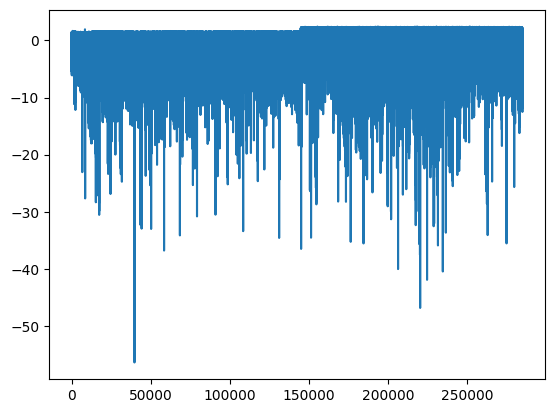

In [38]:
df_plot['V1'].plot()
plt.show()

<Axes: >

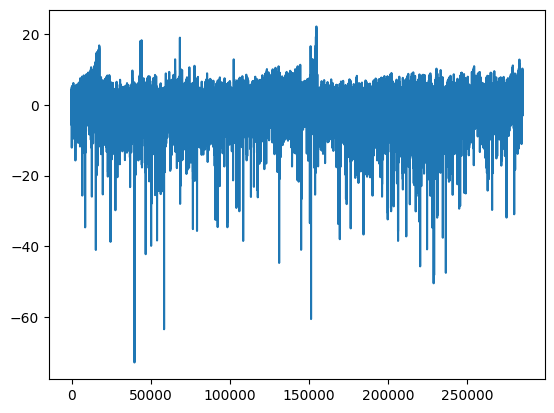

In [41]:
df_plot['V2'].plot()

<Axes: >

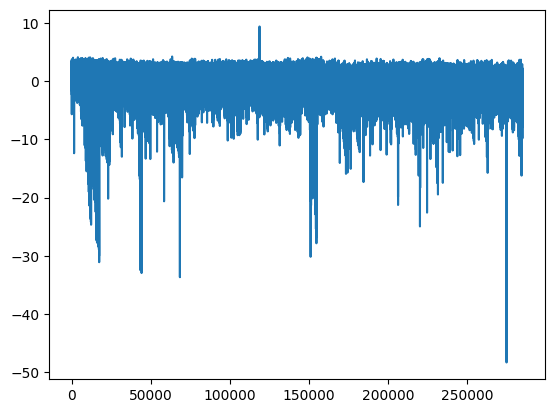

In [42]:
df_plot['V3'].plot()

<Axes: >

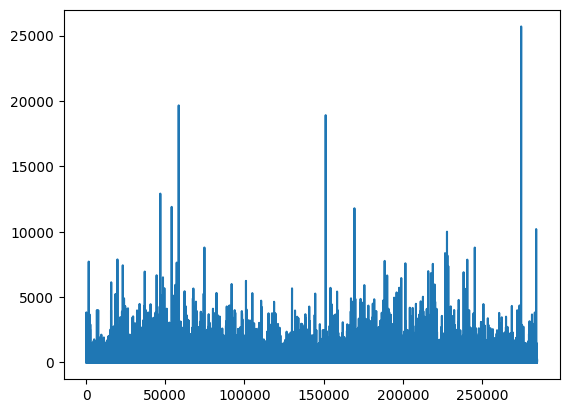

In [43]:
df_plot['Amount'].plot()

### 시계열 데이터 머신러닝 적용시 주의점

In [46]:
# 계량 기반 시계열 모델의 fitting

In [68]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.scaled_amount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

NotImplementedError: ignored

In [69]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.Amount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

NotImplementedError: ignored

In [70]:
# 머신러닝 기반 학습 모델의 fitting

In [71]:
# 재구축한 데이터의 클래스 분포 확인하기

new_df.groupby(by=['Class']).count() # stratified sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,scaled_amount,scaled_time
Class,,,,,,,,,,,,,,,,,,,,,
0,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [72]:
# X와 y 데이터 셋 만들기
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [73]:
# 언더샘플링을 위한 샘플 데이터 구축
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
# 모델 인풋에 들어가기 위한 데이터의 형태 바꾸기
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [75]:
# 학습시킬 모델 로드하기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "K Nearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "LightGBM Classifier": LGBMClassifier()
}

In [76]:
# 모델별 cross validation 한 결과의 평균 정확도 점수 출력하기
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, ':', round(training_score.mean(), 2) * 100, '% accuracy')

LogisticRegression : 92.0 % accuracy
KNeighborsClassifier : 65.0 % accuracy
SVC : 55.00000000000001 % accuracy
DecisionTreeClassifier : 91.0 % accuracy
RandomForestClassifier : 94.0 % accuracy
GradientBoostingClassifier : 94.0 % accuracy
LGBMClassifier : 94.0 % accuracy


### 동일한 데이터를 시계열로 처리할 때 vs 안할 때

In [78]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
78145,57389.0,1.252320,-0.740328,1.121754,-0.324178,-1.654252,-0.694579,-0.836625,-0.145130,-0.450314,...,0.002105,0.806917,0.184296,1.136822,-0.015851,0.028338,44.41,0,0.313142,-0.320763
127727,78442.0,-0.641579,-0.672523,0.929032,-2.563844,-0.200212,-0.320774,0.344659,-0.021200,-3.034746,...,0.258888,-0.378065,-0.142243,-0.594845,0.053751,0.109239,112.15,0,1.259694,-0.073427
190680,128939.0,2.043521,0.014738,-1.833420,0.232852,0.560494,-0.321627,-0.008735,0.014921,0.411033,...,0.308687,0.097803,-0.297848,0.181684,-0.070577,-0.046475,1.98,0,-0.279746,0.519825
237829,149412.0,-1.228419,-0.242352,0.141940,-0.482366,1.762839,-1.088283,0.557739,0.027228,0.160999,...,0.129470,0.464584,0.153903,-0.111982,0.039942,0.186032,79.54,0,0.804024,0.760347
142579,84802.0,-0.555442,1.094443,0.938871,1.485610,2.487871,4.479312,0.306391,0.562903,-1.049889,...,-0.427441,1.025181,0.347922,0.356353,-0.242144,-0.306716,37.85,0,0.221477,0.001292


In [79]:
# 시계열 단위로 바꿉니다
df.index = df['Time']
df.set_index('Time', inplace=True)

In [80]:
df.head(30)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
Time,,,,,,,,,,,,,,,,,,,,,
57389.0,1.252320,-0.740328,1.121754,-0.324178,-1.654252,-0.694579,-0.836625,-0.145130,-0.450314,0.506684,...,0.002105,0.806917,0.184296,1.136822,-0.015851,0.028338,44.41,0,0.313142,-0.320763
78442.0,-0.641579,-0.672523,0.929032,-2.563844,-0.200212,-0.320774,0.344659,-0.021200,-3.034746,0.819535,...,0.258888,-0.378065,-0.142243,-0.594845,0.053751,0.109239,112.15,0,1.259694,-0.073427
128939.0,2.043521,0.014738,-1.833420,0.232852,0.560494,-0.321627,-0.008735,0.014921,0.411033,-0.186930,...,0.308687,0.097803,-0.297848,0.181684,-0.070577,-0.046475,1.98,0,-0.279746,0.519825
149412.0,-1.228419,-0.242352,0.141940,-0.482366,1.762839,-1.088283,0.557739,0.027228,0.160999,-1.697133,...,0.129470,0.464584,0.153903,-0.111982,0.039942,0.186032,79.54,0,0.804024,0.760347
84802.0,-0.555442,1.094443,0.938871,1.485610,2.487871,4.479312,0.306391,0.562903,-1.049889,1.455201,...,-0.427441,1.025181,0.347922,0.356353,-0.242144,-0.306716,37.85,0,0.221477,0.001292
157548.0,2.040211,-0.146975,-2.955934,-0.578356,2.609358,3.142642,-0.416883,0.784393,0.359902,-0.351075,...,0.363485,0.604827,-0.264560,0.219671,-0.039209,-0.042787,1.98,0,-0.279746,0.855931
29209.0,-1.026844,0.846284,1.791740,0.493236,-0.642461,0.311220,0.038417,0.767037,-0.552714,-0.687767,...,0.000179,0.216122,0.026007,0.319282,-0.091676,-0.002626,44.99,0,0.321246,-0.651829
162511.0,1.710916,-0.927310,0.035772,1.179793,-0.897646,0.902637,-1.273300,0.563881,1.558436,0.325448,...,0.127975,0.203923,-0.405688,-0.612785,0.055678,-0.013083,100.00,0,1.089918,0.914238
125519.0,2.094913,-0.051876,-1.537010,0.130034,0.564274,-0.332391,0.206511,-0.256766,0.413521,0.027361,...,0.256100,0.061284,-0.148657,0.202826,-0.072644,-0.055334,17.99,0,-0.056033,0.479646


<Axes: xlabel='Time'>

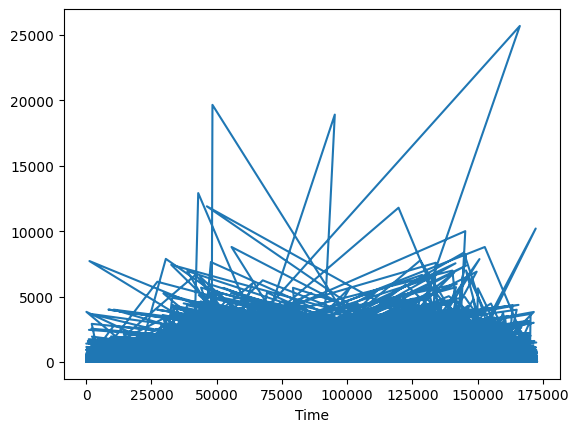

In [81]:
df['Amount'].plot()